In [57]:
import os
import json

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from shapely import wkt
from matplotlib.patches import Polygon

In [23]:
df = pd.read_csv(os.path.join('..', 'data', 'fences-quays', 'metadata.csv'))
gdf = gpd.read_file(os.path.join('..', 'data', 'neighborhoods.geojson'))

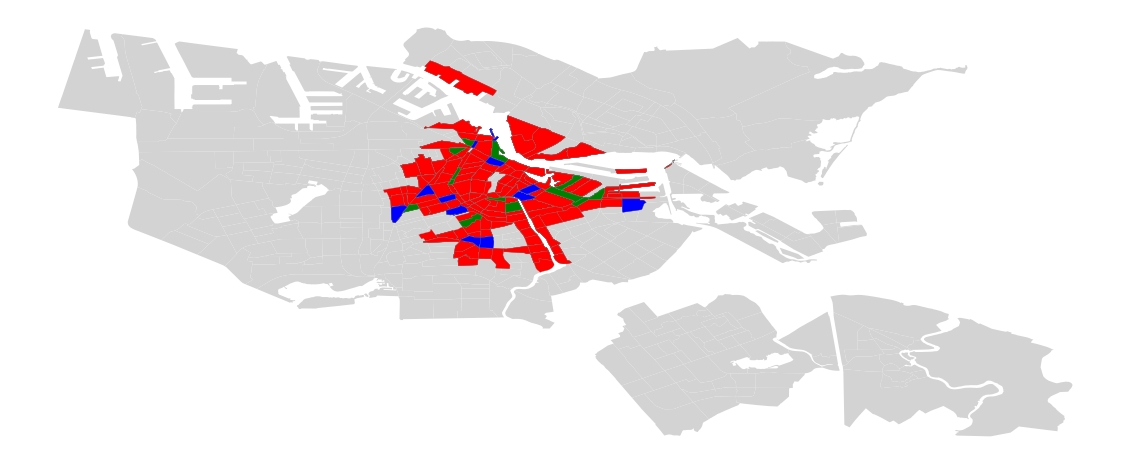

In [69]:
plt.rcParams["figure.figsize"] = (20,10)

subsets = ['train', 'test', 'valid']
ax = gdf.plot(color='lightgray')

for subset, color in zip(subsets, ['r', 'g', 'b']):
    label = subset
    subset = gpd.GeoDataFrame(df[df.subset == subset].geometry_y.apply(wkt.loads))
    subset = subset.rename(columns={'geometry_y':'geometry'})
#     subset['coords'] = subset['geometry'].apply(lambda x: x.representative_point().coords[:])
#     subset['coords'] = subset[coords[0] for coords in c['coords']]
    subset.plot(ax=ax, color=color, edgecolor='0.5', linewidth=.25)
    
#     for idx, row in c.iterrows():
#         plt.annotate(s=row['NAME'], xy=row['coords'],
#                  horizontalalignment='center')

plt.axis('off')
plt.show()

In [56]:
df.subset.value_counts()

train    1682
test      163
valid     155
Name: subset, dtype: int64

In [64]:
fences, quays = 0, 0

for subset in ['train', 'test', 'valid']:
    fpath = os.path.join('..', 'data', 'fences-quays', 'annotations', f'{subset}-annotations-6px.json')
    
    with open(fpath, 'r') as f:
        data = json.load(f)

    for image in data['images']:
        fence, quay = False, False
        for annotation in data['annotations']:
            if annotation['image_id'] == image['id']:
                if annotation.get('counts'):
                    fence = True
                if annotation.get('segmentation'):
                    quay = True
        fences += fence
        quays += quay

    print(fences, quays)
        
    

1173 1299
1302 1437
1414 1567
